<a href="https://colab.research.google.com/github/maggiecrowner/DS3001-Project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DS 3001 Project

##Data Cleaning/EDA

In [ ]:
! git clone https://github.com/maggiecrowner/DS3001-Project

fatal: destination path 'DS3001-Project' already exists and is not an empty directory.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Wrangling

In [ ]:
df = pd.read_csv('/content/DS3001-Project/spotify_songs.csv', low_memory=False)

df = df.drop('track_id', axis=1)
df = df.drop('track_album_id', axis=1)
df = df.drop('playlist_id', axis=1)
df = df.drop('playlist_name', axis=1)
df = df.drop('playlist_genre', axis=1)
df = df.drop('playlist_subgenre', axis=1)
df = df.drop('track_album_name', axis=1)
df = pd.DataFrame.dropna(df, axis=0)

df.loc[:,'mode'] = df['mode'].replace(to_replace=0, value='Minor')
df.loc[:,'mode'] = df['mode'].replace(to_replace=1, value='Major')

df['year'] = df['track_album_release_date'].str[:4]
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df = df[df['year'] >= 2000]
df.loc[:, 'year'] = df['year'].astype(str)

df['month'] = df['track_album_release_date'].str[5:7]
df = df.drop('track_album_release_date', axis=1)

month_mapping = {
    '01': 'January',
    '02': 'February',
    '03': 'March',
    '04': 'April',
    '05': 'May',
    '06': 'June',
    '07': 'July',
    '08': 'August',
    '09': 'September',
    '10': 'October',
    '11': 'November',
    '12': 'December'}
df.loc[:, 'month'] = df['month'].map(month_mapping)

key_mapping = {
    0: 'C',
    1: 'C_Sharp',
    2: 'D',
    3: 'D_Sharp',
    4: 'E',
    5: 'F',
    6: 'F_Sharp',
    7: 'G',
    8: 'G_Sharp',
    9: 'A',
    10: 'A_Sharp',
    11: 'B'}
df.loc[:, 'key'] = df['key'].map(key_mapping)

display(df)

,track_name,track_artist,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,month
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,0.748,0.916,F_Sharp,-2.634,Major,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,2019,June
1,Memories - Dillon Francis Remix,Maroon 5,67,0.726,0.815,B,-4.969,Major,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,2019,December
2,All the Time - Don Diablo Remix,Zara Larsson,70,0.675,0.931,C_Sharp,-3.432,Minor,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616,2019,July
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,0.718,0.930,G,-3.778,Major,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093,2019,July
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,0.650,0.833,C_Sharp,-4.672,Major,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052,2019,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,City Of Lights - Official Radio Edit,Lush & Simon,42,0.428,0.922,D,-1.814,Major,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375,2014,April
32829,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,0.522,0.786,C,-4.462,Major,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120,2013,March
32830,Sweet Surrender - Radio Edit,Starkillers,14,0.529,0.821,F_Sharp,-4.899,Minor,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112,2014,April
32831,Only For You - Maor Levi Remix,Mat Zo,15,0.626,0.888,D,-3.361,Major,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432,2014,January


EDA

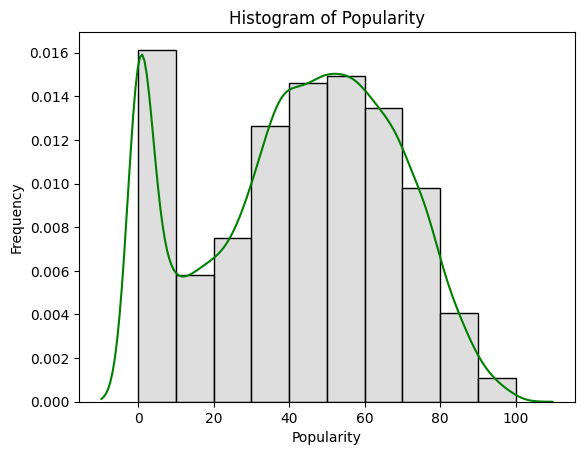

In [ ]:
sns.histplot(df["track_popularity"], bins=10, color='lightgray', stat='density')
sns.kdeplot(df["track_popularity"], color='green')
plt.title('Histogram of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

A histogram of our likely response variable, which is the popularity of the song.

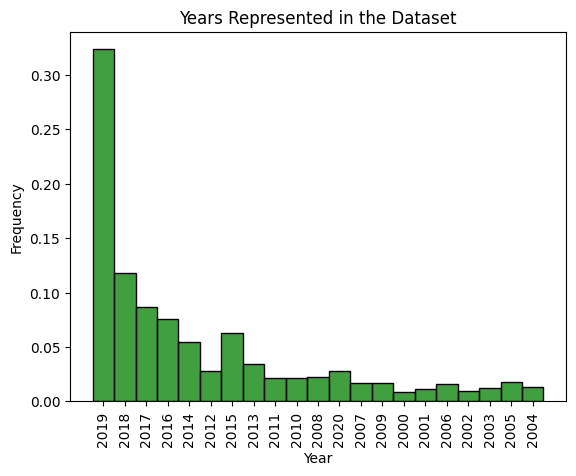

In [ ]:
sns.histplot(df["year"], color='green', stat='density')
plt.title('Years Represented in the Dataset')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

A histogram of our years variable. Our dataset includes data from 2004-2019, with more data in more recent years.

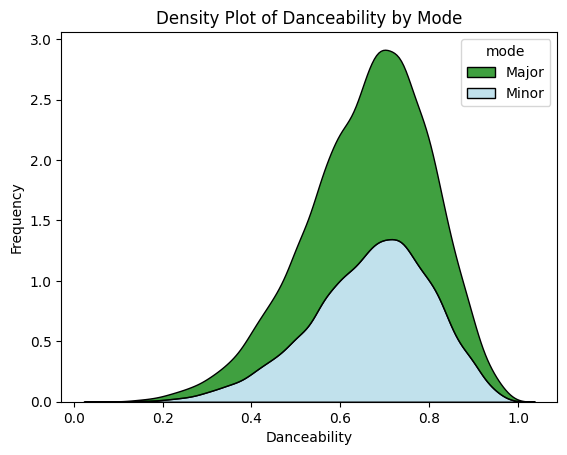

In [ ]:
sns.set_palette(['green', 'lightblue'])
sns.kdeplot(df, x='danceability', hue='mode', multiple='stack')
plt.title('Density Plot of Danceability by Mode')
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.show()

A stacked density plot of danceability by whether the song is in a major or minor key. As you can see, there are more major songs in general, but the distribution of danceability is essentially the same for both modes.